In [1]:
# do the required imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(r'Modules')
import wellplate_tools_pandas_py3_4 as wpt
%matplotlib inline

In [2]:
#filename_single = r'Data\well96_1Pos_Single.csv'
#filename_single = r'Data\fixed endpoint 3C 2_5 384well_Single.csv'
#filename_single = r'Data\96Well_Ch=1_26Wells_1P_Well_SingleRegions.csv'
filename_single = r'Data\96Well_Test_4Well.csv'

# define wellplate type
platetype = 96
# THIS PARAMETER LIST DEPENDS ON THE ACTUAL ZEN Image Analysis Setting (CZIAS) AND MUST BE ADAPTED
#parameter_list = ['DAPI_Mean', 'Area', 'Perimeter', 'Roundness', 'FeretRatio']
#parameter_list = ['DAPI_Mean', 'Area', 'Perimeter', 'Roundness']
# define number of measured parameters beside the actual object number
num_param = len(parameter_list)
Nr, Nc = wpt.getrowandcolumn(platetype)

In [4]:
# read the CSV table containing all the single object data for
# further "in-depth" analysis
df_single = pd.read_csv(filename_single, sep=';')

# rename columns and correct data types
df_single = wpt.rename_col_fromcsv_single(df_single, parameter_list)

# show part of dataframe
df_single[:3]

,WellID,RowID,ColumnID,ID,Index,DAPI_Mean,Area,Perimeter,Roundness
1,A1,1.0,1.0,2.0,1.0,88.544643,369.359872,72.898118,0.685591
2,A1,1.0,1.0,3.0,2.0,89.075472,524.359104,88.930542,0.562352
3,A1,1.0,1.0,4.0,3.0,127.159184,807.974720,108.412448,0.612860


In [5]:
# use statistics --> we just calculate the mean values
# for a wells to be displayed inside the heatmaps.
# currently implemented are mean, median, min, max.
stf = 'mean'

# create a dictionary containing a dataframe for every measure parameters
# as a heatmap and a dictionary containg the mean values for all wells
# containg actual data points.
heatmap_dict, well_dict = wpp.fill_heatmaps(df_single, num_param, Nr, Nc, statfunc=stf, showbar=True, verbose=False)

In [6]:
# show all keys
print heatmap_dict.keys()

['Perimeter', 'DAPI_Mean', 'Roundness', 'ObjectNumber', 'Area']


('Heatmap image saved as: ', 'Data\\96Well_Test_4Well_HM_Roundness.png')


'Data\\96Well_Test_4Well_HM_Roundness.png'

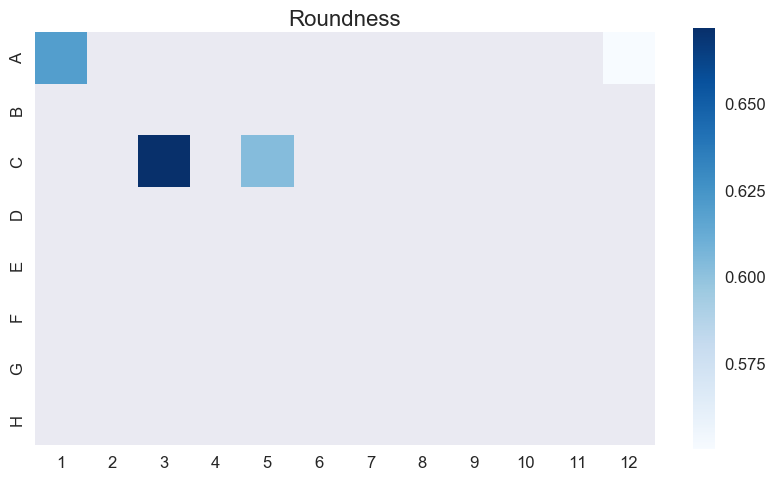

In [7]:
# define parameters to display the heatmap
parameter2display = 'Roundness'
colormap='Blues'
#colormap ='YlGnBu'
#colormap ='RdBu_r'
#colormap = 'RdYlBu'
hm = heatmap_dict[parameter2display]

# show the heatmap for a single parameter
wpp.showheatmap(hm, parameter2display, fontsize_title=16, fontsize_label=12,
               colormap=colormap, save=True, filename=filename_single)

('Heatmap image saved as: ', 'Data\\96Well_Test_4Well_HM_all.png')


'Data\\96Well_Test_4Well_HM_all.png'

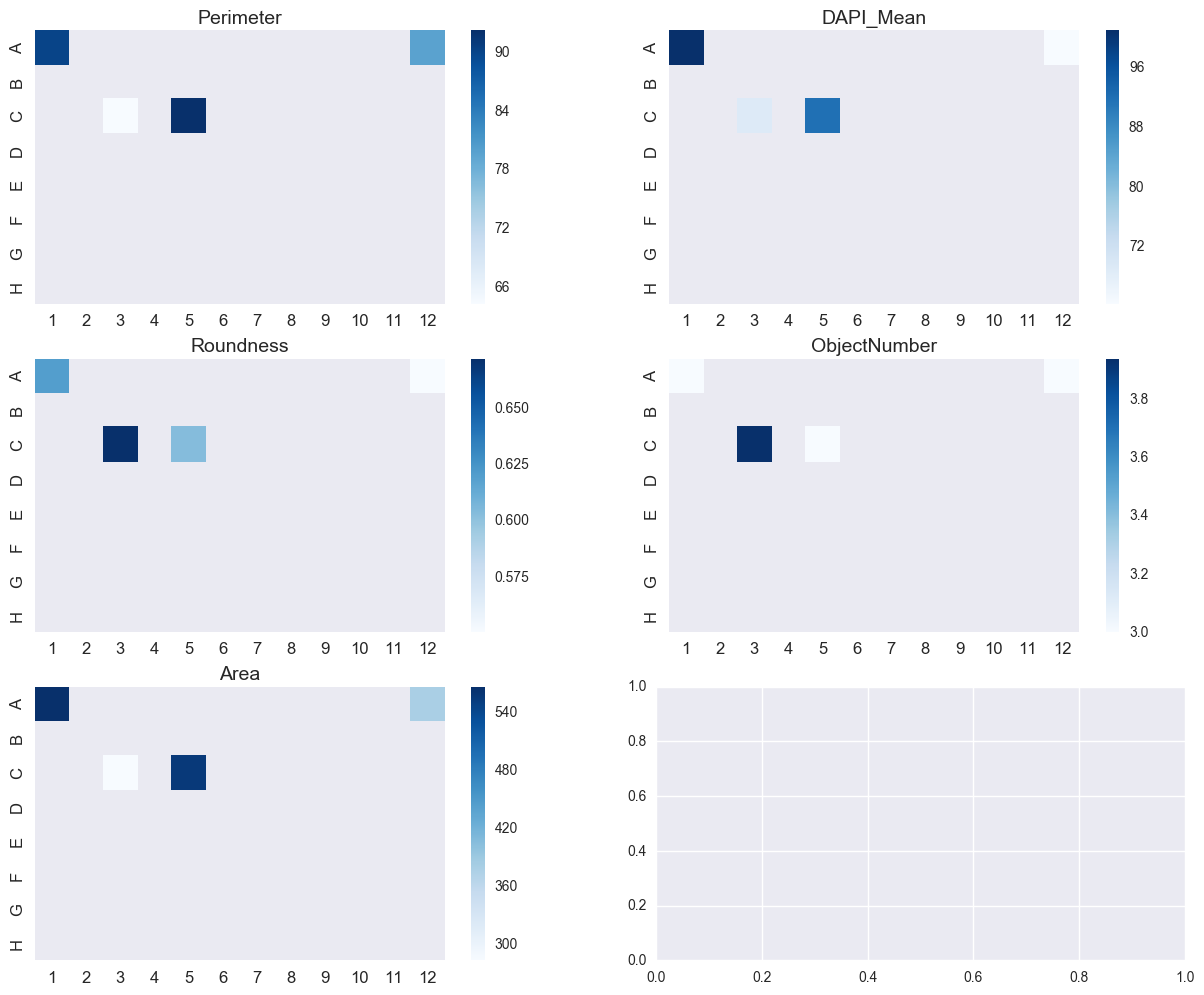

In [8]:
# define parameters to display the heatmap
fontsize_title = 14
fontsize_label = 12
#colormap ='YlGnBu'
#colormap ='RdBu_r'
colormap = 'Blues'

# show all heatmaps
wpp.showheatmap_all(heatmap_dict, [3, 2], fontsize_title=14, fontsize_label=12,
                    colormap='Blues', save=True, filename=filename_single)

In [10]:
# show all key = measure parameters for that dictionary
print(heatmap_dict.keys())

# example for entry for well ...
well_dict['C3']

['Perimeter', 'DAPI_Mean', 'Roundness', 'ObjectNumber', 'Area']


RowID             3.000000
ColumnID          3.000000
ID                3.500000
Index             2.500000
DAPI_Mean        69.099858
Area            277.019904
Perimeter        63.286224
Roundness         0.675461
ObjectNumber      4.000000
dtype: float64

In [ ]:
# show example entry of the dictionary for a parameter
heatmap_dict['ObjectNumber']

In [11]:
type(well_dict['C3'])

pandas.core.series.Series